In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cotacao_petroleo.txt', sep='\t', names=['ds', 'y'])

In [3]:
df.head()

,ds,y
0,18/12/2023,"78,89"
1,15/12/2023,"76,84"
2,14/12/2023,"77,05"
3,13/12/2023,"74,14"
4,12/12/2023,"74,11"


In [4]:
df.shape

(11069, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      11069 non-null  object
 1   y       11069 non-null  object
dtypes: object(2)
memory usage: 173.1+ KB


In [6]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [7]:
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].str.replace(',', '.').astype(float)
df = df.set_index('ds')

C:\Users\joaoa\AppData\Local\Temp\ipykernel_6472\3624516811.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ds'] = pd.to_datetime(df['ds'])


In [8]:
df.head()

,y
ds,
2023-12-18,78.89
2023-12-15,76.84
2023-12-14,77.05
2023-12-13,74.14
2023-12-12,74.11


<Axes: xlabel='ds', ylabel='y'>

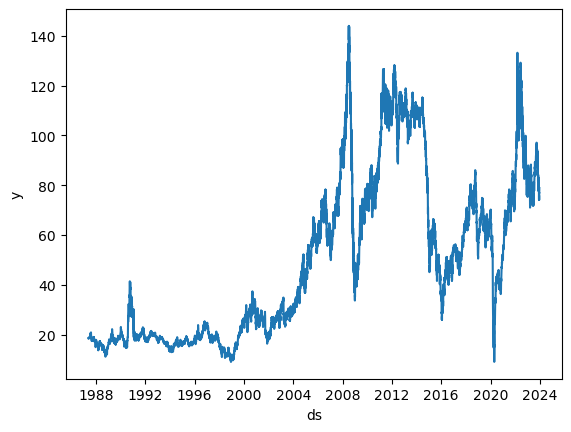

In [9]:
sns.lineplot(data=df, x='ds', y='y')

<Axes: xlabel='ds', ylabel='y'>

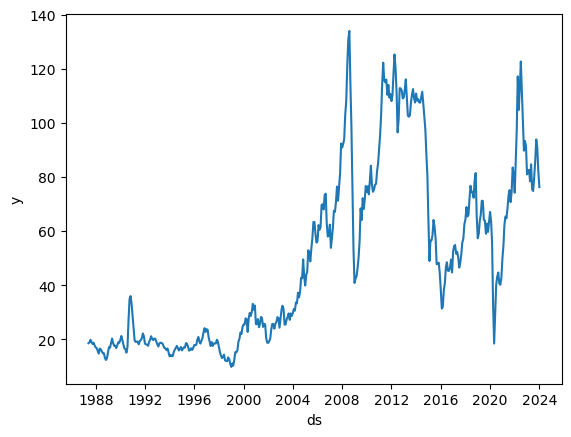

In [10]:
sns.lineplot(data=df.resample('1M').apply(np.mean), x='ds', y='y')

<Axes: xlabel='y'>

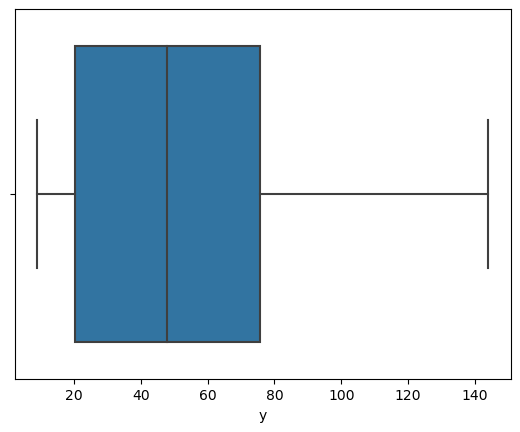

In [11]:
sns.boxplot(data=df, x='y')

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [13]:
resultados = seasonal_decompose(df, period=247)

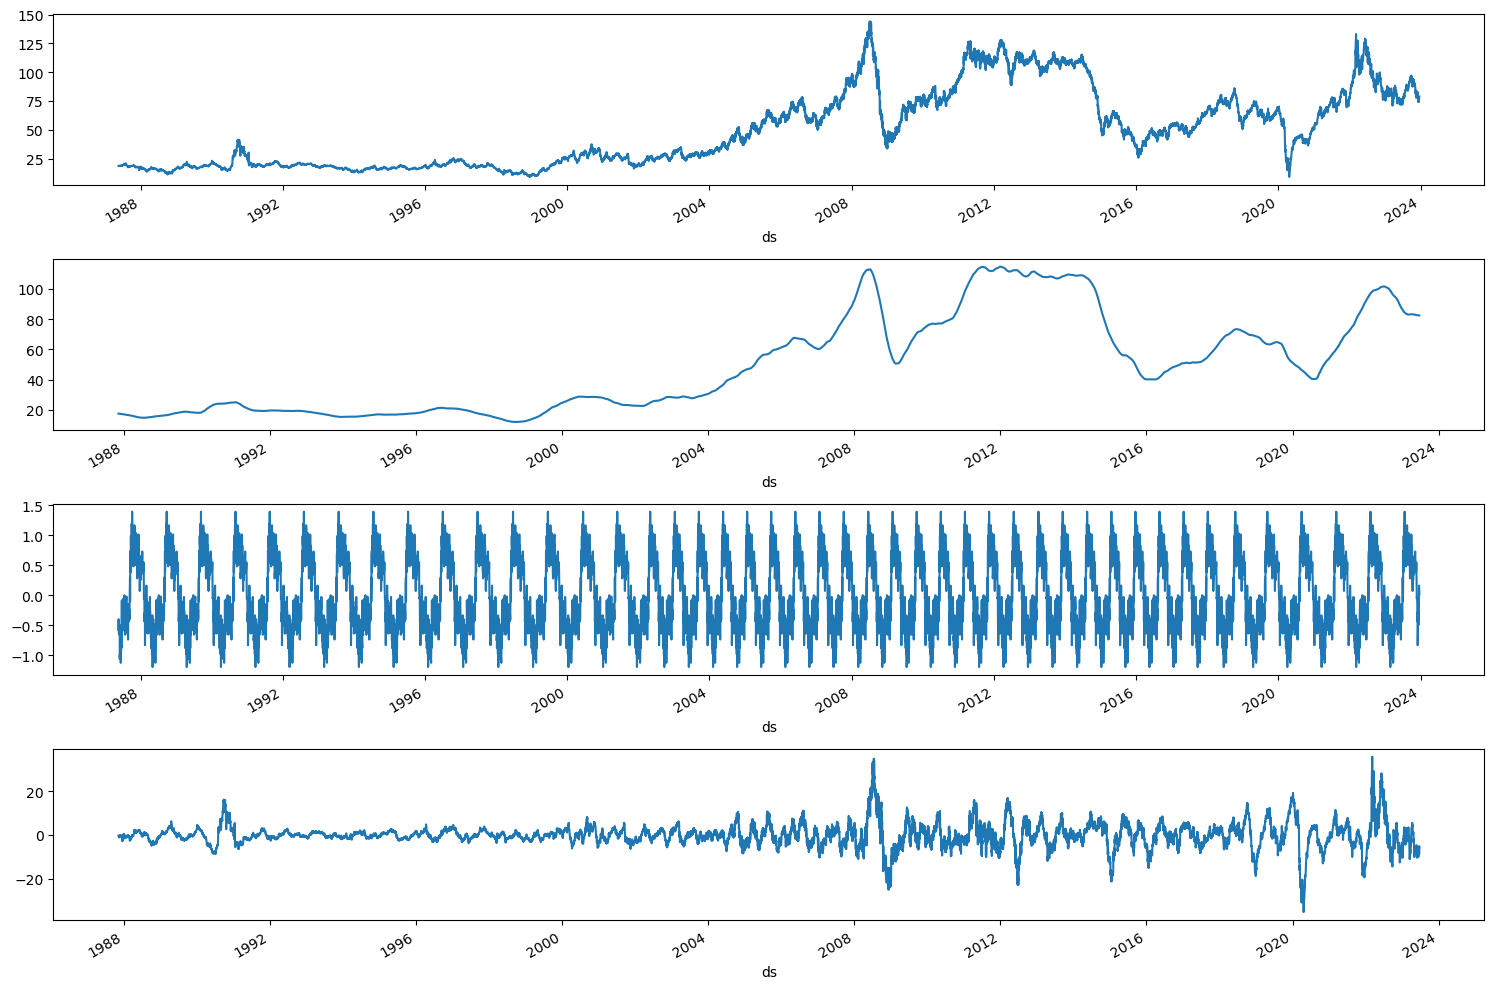

In [14]:
fig, axes = plt.subplots(4, 1, figsize=(15,10))

resultados.observed.plot(ax=axes[0])
resultados.trend.plot(ax=axes[1])
resultados.seasonal.plot(ax=axes[2])
resultados.resid.plot(ax=axes[3])

plt.tight_layout()

In [15]:
result = adfuller(df.y.values)

print('Teste ADF')
print(f'Teste estatístico: {result[0]}')
print(f'P-value: {result[1]}')
print('Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -2.0709439471254614
P-value: 0.2563575127688048
Valores críticos:
	1%: -3.4309426267587546
	5%: -2.861801908484863
	10%: -2.5669094087621245


In [16]:
# Não estacionária, pois P-value > 0.05

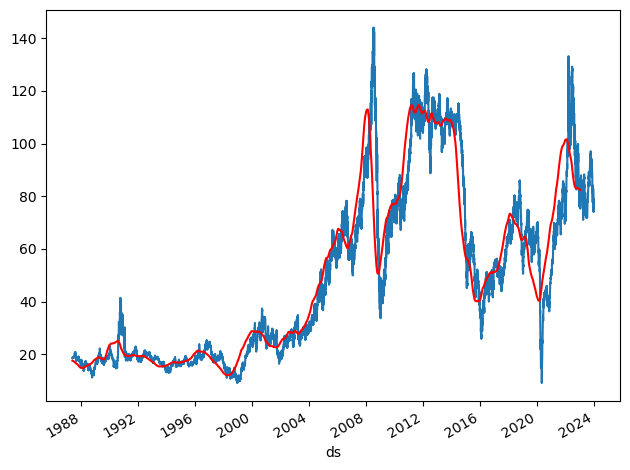

In [17]:
ma = df.rolling(247).mean()
f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

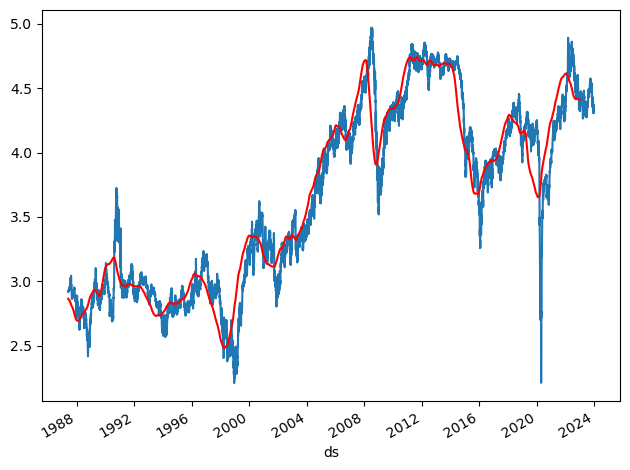

In [18]:
df_log = np.log(df)
ma_log = df_log.rolling(247).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

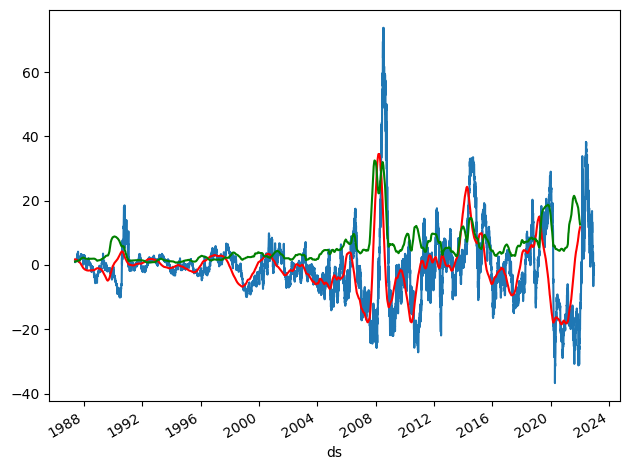

In [19]:
df_s = (df - ma).dropna()

ma_s = df_s.rolling(247).mean()

std = df_s.rolling(247).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, color='r', legend=False)
std.plot(ax=ax, color='g', legend=False)
plt.tight_layout()

In [20]:
X_s = df_s.y.values

result_s = adfuller(X_s)

print('Teste ADF')
print(f'Teste estatístico: {result_s[0]}')
print(f'P-value: {result_s[1]}')
print('Valores críticos:')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste estatístico: -6.389348346157738
P-value: 2.1249002977810183e-08
Valores críticos:
	1%: -3.430956139953452
	5%: -2.861807879965514
	10%: -2.566912587369986


Teste ADF
Teste estatístico: -17.220387128386367
P-value: 6.2854199061629736e-30
Valores críticos:
	1%: -3.4309426267587546
	5%: -2.861801908484863
	10%: -2.5669094087621245


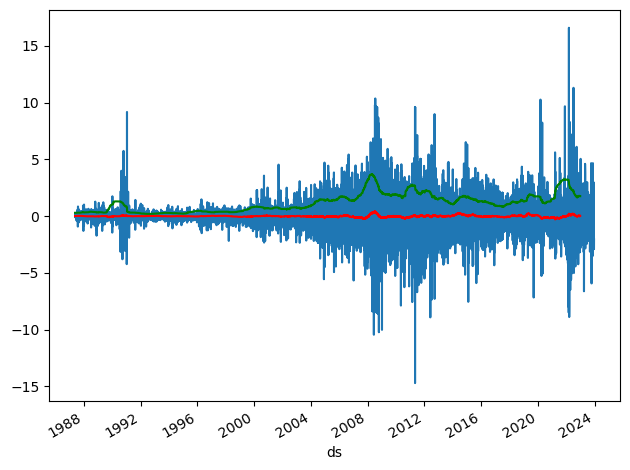

In [21]:
df_diff = df.diff(1)
ma_diff = df_diff.rolling(247).mean()

std_diff = df_diff.rolling(247).std()

f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.tight_layout()

X_diff = df_diff.y.dropna().values

result_diff = adfuller(X_diff)

print('Teste ADF')
print(f'Teste estatístico: {result_diff[0]}')
print(f'P-value: {result_diff[1]}')
print('Valores críticos:')

for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

In [22]:
from statsmodels.tsa.stattools import acf, pacf

In [23]:
lag_acf = acf(df_diff.dropna(), nlags=35)
lag_pacf = pacf(df_diff.dropna(), nlags=35)

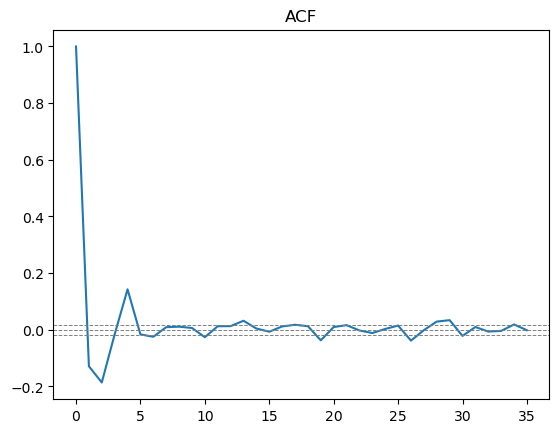

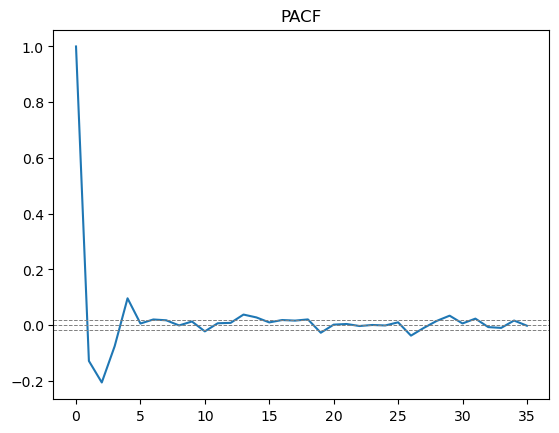

In [24]:
plt.plot(lag_acf)

plt.axhline(y=-1.96/np.sqrt(len(df) - 1), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96/np.sqrt(len(df) - 1), linestyle='--', color='gray', linewidth=0.7)

plt.title('ACF')
plt.show()

plt.plot(lag_pacf)

plt.axhline(y=-1.96/np.sqrt(len(df_diff) - 1), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96/np.sqrt(len(df_diff) - 1), linestyle='--', color='gray', linewidth=0.7)

plt.title('PACF')
plt.show()

In [25]:
# p = 1
# q = 1
# d = 1

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

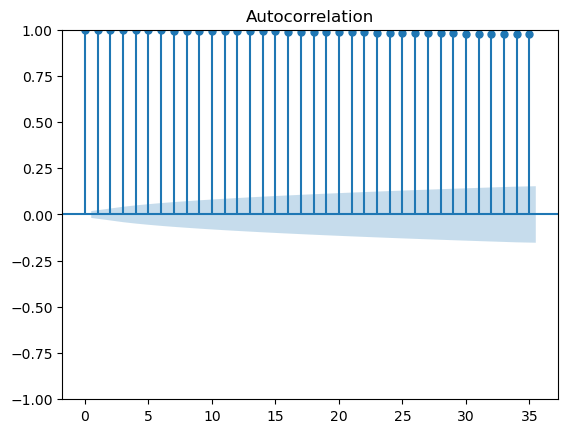

In [27]:
plot_acf(df, lags=35)
plt.show()

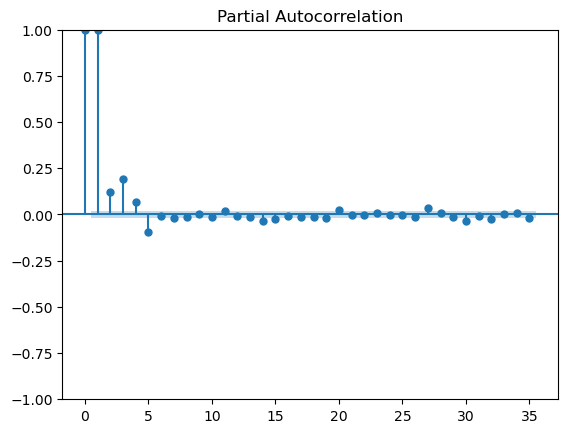

In [28]:
plot_pacf(df, lags=35)
plt.show()

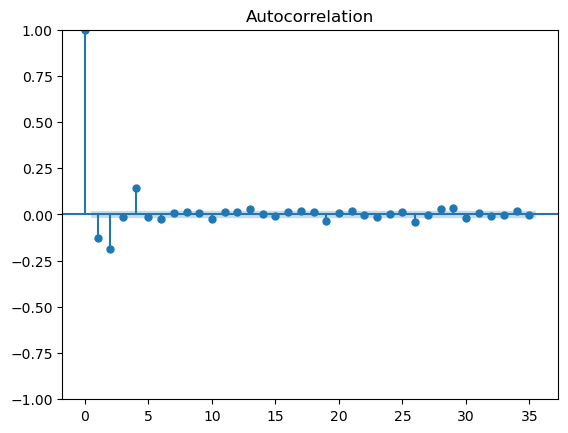

In [29]:
plot_acf(df_diff.dropna(), lags=35)
plt.show()

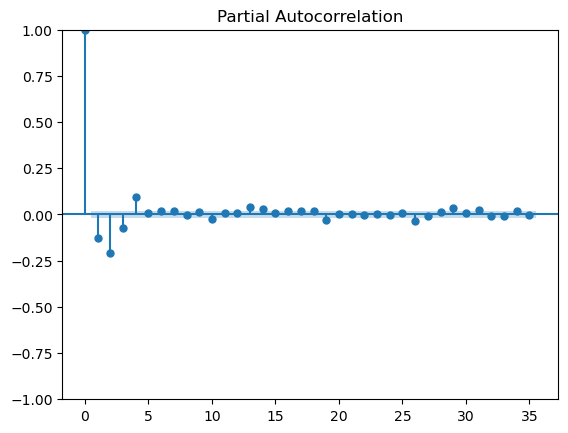

In [30]:
plot_pacf(df_diff.dropna(), lags=35)
plt.show()

In [31]:
# !pip3 install statsforecast

In [32]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA, MSTL, SeasonalExponentialSmoothingOptimized
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

D:\Programas\Anaconda\Lib\site-packages\statsforecast\core.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [33]:
def calcula_wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [34]:
df = df.reset_index('ds')
df['unique_id'] = 0

In [35]:
df_treino = df[df.ds < '2022-12-22']
df_valid = df[df.ds >= '2022-12-22']
h = len(df_valid['ds'])

D:\Programas\Anaconda\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 15.47%


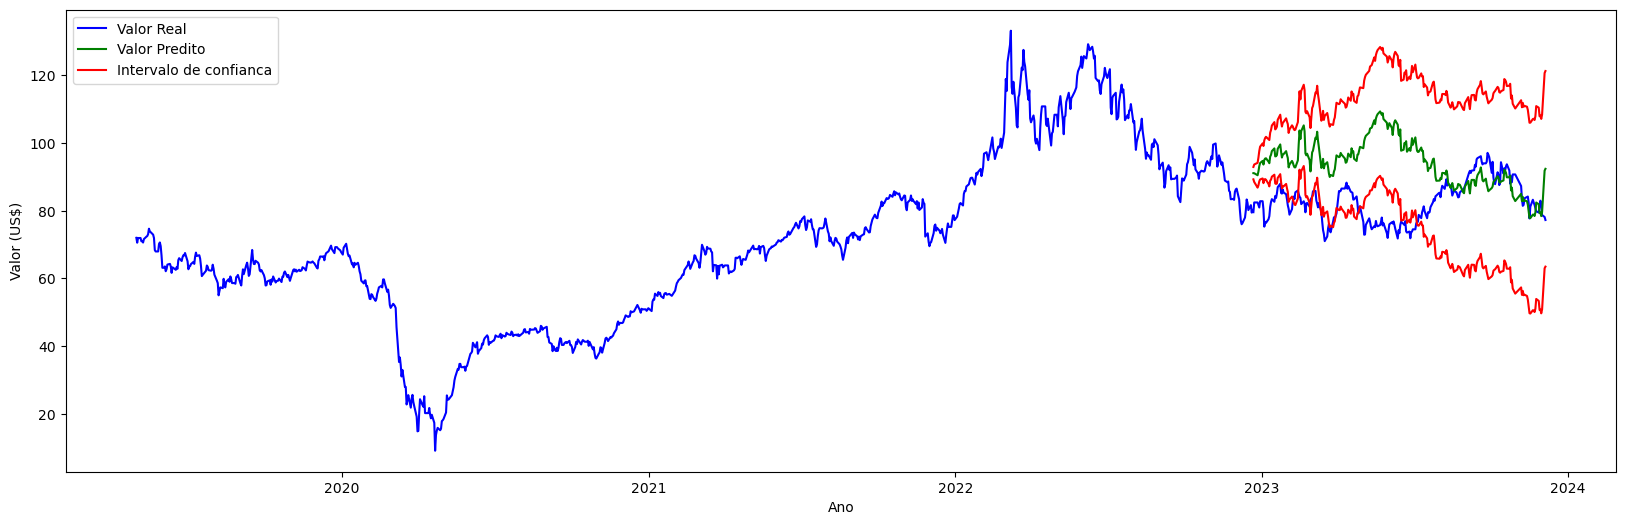

In [36]:
model_s = StatsForecast(models=[MSTL(season_length=[247, 22, 5], trend_forecaster=Naive())], freq='B', n_jobs=-1)
model_s.fit(df_treino)

forecast_df_s = model_s.predict(h=h, level=[90])
forecast_df_s = forecast_df_s.reset_index().merge(df_valid, on=['ds', 'unique_id'], how='left')
forecast_df_s = forecast_df_s.dropna()

wmape2 = calcula_wmape(forecast_df_s['y'].values, forecast_df_s['MSTL'].values)
print(f'WMAPE: {wmape2:.2%}')

plt.figure(figsize=(20, 6))
sns.lineplot(data=df_treino[df_treino.ds >= '2019-05-01'], x='ds', y='y', color='b', label='Valor Real')
sns.lineplot(data=forecast_df_s, x='ds', y='y', color='b')
sns.lineplot(data=forecast_df_s, x='ds', y='MSTL', color='g', label='Valor Predito')
sns.lineplot(data=forecast_df_s, x='ds', y='MSTL-lo-90', color='r', label='Intervalo de confianca')
sns.lineplot(data=forecast_df_s, x='ds', y='MSTL-hi-90', color='r')
plt.xlabel('Ano')
plt.ylabel('Valor (US$)')
plt.legend()
plt.show()